In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

<p style="color: rgba(42, 147, 165, 1); font-size: 40px; font-weight: bolder; font-family: Arial, Helvetica, sans-serif;">Data Loading</p>

In [49]:
data_file_path = r"C:\Users\Nigatie\Documents\Files Extracted\Practice\pythone\Dataset_Files\House Price Prediction Dataset.csv"
hous_price_df = pd.read_csv(data_file_path)
hous_price_df.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


<p style="color: rgba(42, 147, 165, 1); font-size: 40px; font-weight: bolder; font-family: Arial, Helvetica, sans-serif;">Data PreProcessing</p>

In [50]:
#Know how many rows and columns are there
hous_price_df.shape

(2000, 10)

In [4]:
#Get the datatype and non-null values in each column
hous_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


In [5]:
#know how much missing values are there in each column
hous_price_df.isnull().sum()

Id           0
Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64

In [6]:
#Check if there are duplicate rows in my dataset- duplicate function return boolean series denoting duplicate rows
print(hous_price_df.duplicated().sum())

0


In [7]:
#Drop irrelevant features from our features
hous_price_df = hous_price_df.drop(columns=["Id"], axis=1)
print("After dropping irrelevant features, the shape of our data is:", hous_price_df.shape)

After dropping irrelevant features, the shape of our data is: (2000, 9)


In [8]:
hous_price_df.head()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3592,2,2,3,1938,Downtown,Good,No,266746
3,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [9]:
hous_price_df.nunique()

Area         1622
Bedrooms        5
Bathrooms       4
Floors          3
YearBuilt     124
Location        4
Condition       4
Garage          2
Price        1999
dtype: int64

In [10]:
#Separate categorical and numerical columns
object_col=[columns for columns in hous_price_df.columns if hous_price_df[columns].dtype=='object']
number_col=[columns for columns in hous_price_df.columns if hous_price_df[columns].dtype!='object']
print("Categorical columns:", object_col)
print("Numerical columns:", number_col)

Categorical columns: ['Location', 'Condition', 'Garage']
Numerical columns: ['Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt', 'Price']


In [11]:
print("Categorical columns:", hous_price_df[object_col].nunique())   

Categorical columns: Location     4
Condition    4
Garage       2
dtype: int64


In [12]:
print(hous_price_df["Location"].unique(), hous_price_df["Condition"].unique(), hous_price_df["Garage"].unique())

['Downtown' 'Suburban' 'Urban' 'Rural'] ['Excellent' 'Good' 'Fair' 'Poor'] ['No' 'Yes']


In [13]:
#mapping ordinal categorical columns
mapping={
    "Condition": {"Poor":0, "Fair":1, "Good":2, "Excellent":3},
    "Location": {"Downtown":0, "Suburban":1, "Urban":2, "Rural":3},
    "Garage": {"No":0, "Yes":1}
}

In [51]:
Ecoded_hous_price_df = hous_price_df.replace(mapping)
display(hous_price_df.head())     #data before encoding categorical columns
Ecoded_hous_price_df.head()       #data after encoding categorical columns

C:\Users\Nigatie\AppData\Local\Temp\ipykernel_1536\214996794.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Ecoded_hous_price_df = hous_price_df.replace(mapping)


,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,0,3,0,149919
1,2,4272,5,4,3,1958,0,3,0,424998
2,3,3592,2,2,3,1938,0,2,0,266746
3,4,966,4,2,2,1902,1,1,1,244020
4,5,4926,1,4,2,1975,0,1,1,636056


In [15]:
#Updating the hous_price_df with encoded data
object_col=[columns for columns in Ecoded_hous_price_df.columns if Ecoded_hous_price_df[columns].dtype=='object']
number_col=[columns for columns in Ecoded_hous_price_df.columns if Ecoded_hous_price_df[columns].dtype!='object']
print("Categorical columns:", object_col)      #should be empty now
print("Numerical columns:", number_col)        #should contain all columns now

Categorical columns: []
Numerical columns: ['Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt', 'Location', 'Condition', 'Garage', 'Price']


<p style="color: rgba(42, 147, 165, 1); font-size: 40px; font-weight: bolder; font-family: Arial, Helvetica, sans-serif;">Data Analysis and Visualize</p>

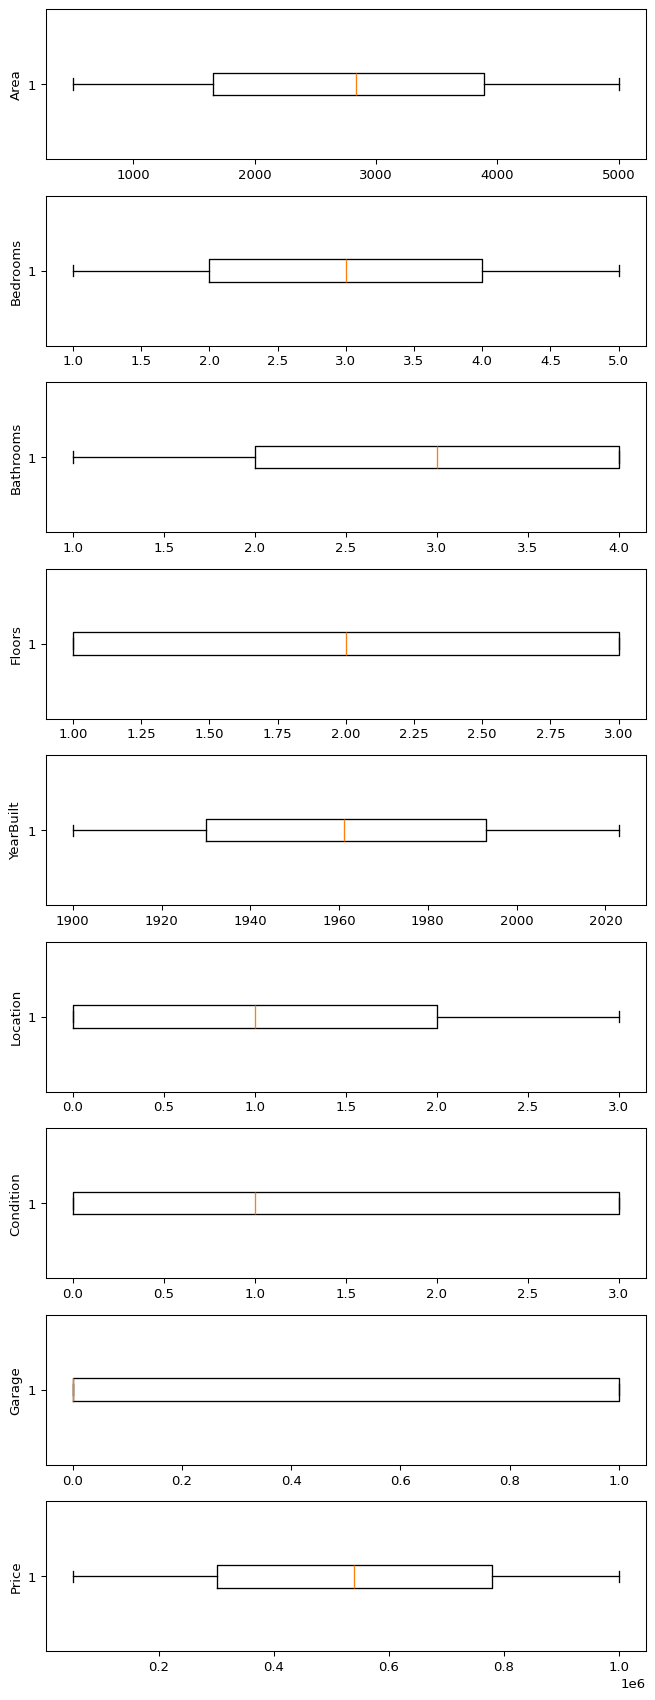

In [16]:
#Detect outliers in numerical columns using boxplot

fig, axs = plt.subplots(len(Ecoded_hous_price_df[number_col].columns), 1, figsize=(7, 18), dpi=95)
for i, col in enumerate(Ecoded_hous_price_df[number_col].columns):
    axs[i].boxplot(Ecoded_hous_price_df[col], vert=False)
    axs[i].set_ylabel(col)
    plt.tight_layout()
plt.show()
#As i know there are not outliers detected in all six numerical columns, then handling outliers is not necessary

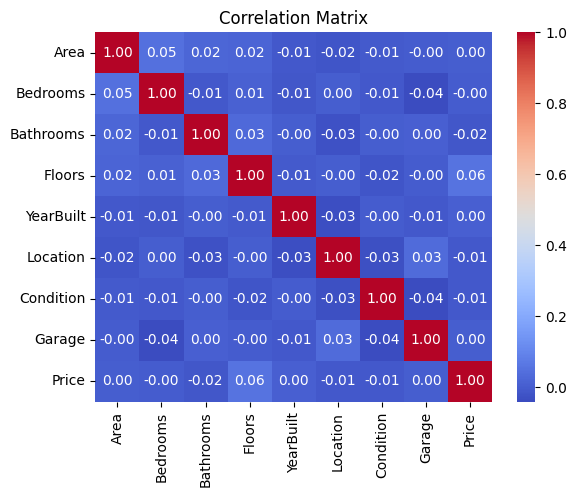

In [ ]:
#Analays the correlation between numerical columns(heatmap)
correlation = Ecoded_hous_price_df[number_col].corr()     #Calculate correlation matrix for numerical columns
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<p style="color: rgb(227, 2, 190); font-size: 30px; font-weight: bolder; font-family: Arial, Helvetica, sans-serif;">Scalling</p>

In [18]:
#Scale numerical columns using Max Abs Scaler
max_abs = np.max(np.abs(Ecoded_hous_price_df[number_col]), axis=0)

scaled_df = Ecoded_hous_price_df[number_col] / max_abs

scaled_df.head()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,0.272054,1.0,1.0,1.000000,0.973801,0.000000,1.000000,0.0,0.149971
1,0.854571,1.0,1.0,1.000000,0.967870,0.000000,1.000000,0.0,0.425144
2,0.718544,0.4,0.5,1.000000,0.957983,0.000000,0.666667,0.0,0.266838
3,0.193239,0.8,0.5,0.666667,0.940188,0.333333,0.333333,1.0,0.244104
4,0.985397,0.2,1.0,0.666667,0.976273,0.000000,0.333333,1.0,0.636275


In [19]:
#min max scaling
from sklearn.preprocessing import minmax_scale
minmax_scaled_hous_price_Dataframe = pd.DataFrame(minmax_scale(Ecoded_hous_price_df[number_col]), columns=number_col)
minmax_scaled_hous_price_Dataframe.head()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,0.190974,1.00,1.000000,1.0,0.569106,0.000000,1.000000,0.0,0.105211
1,0.838373,1.00,1.000000,1.0,0.471545,0.000000,1.000000,0.0,0.394875
2,0.687194,0.25,0.333333,1.0,0.308943,0.000000,0.666667,0.0,0.228232
3,0.103379,0.75,0.333333,0.5,0.016260,0.333333,0.333333,1.0,0.204301
4,0.983771,0.00,1.000000,0.5,0.609756,0.000000,0.333333,1.0,0.617123


In [20]:
#Normalizaiton euclidean norm
from sklearn.preprocessing import normalize
normalized_hous_price_Dataframe = pd.DataFrame(normalize(Ecoded_hous_price_df[number_col], norm='l2'), columns=number_col)
normalized_hous_price_Dataframe.head()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,0.009070,0.000033,0.000027,0.000020,0.013139,0.000000,0.000020,0.000000,0.999873
1,0.010051,0.000012,0.000009,0.000007,0.004607,0.000000,0.000007,0.000000,0.999939
2,0.013464,0.000007,0.000007,0.000011,0.007264,0.000000,0.000007,0.000000,0.999883
3,0.003959,0.000016,0.000008,0.000008,0.007794,0.000004,0.000004,0.000004,0.999962
4,0.007744,0.000002,0.000006,0.000003,0.003105,0.000000,0.000002,0.000002,0.999965


In [33]:
#Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardized_hous_price_Dataframe = pd.DataFrame(scaler.fit_transform(Ecoded_hous_price_df[number_col]), columns=number_col)  #i think this is most suitable for this dataset
standardized_hous_price_Dataframe.head()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,-1.101471,1.401791,1.305568,1.244151,0.238155,-1.271530,1.342817,-0.962695,-1.403091
1,1.147485,1.401791,1.305568,1.244151,-0.095942,-1.271530,1.342817,-0.962695,-0.407725
2,0.622317,-0.704581,-0.498326,1.244151,-0.652770,-1.271530,0.454711,-0.962695,-0.980356
3,-1.405759,0.699667,-0.498326,0.008035,-1.655061,-0.386987,-0.433396,1.038750,-1.062589
4,1.652574,-1.406705,1.305568,0.008035,0.377363,-1.271530,-0.433396,1.038750,0.355982


In [22]:
#Rebust Scaler
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
robust_scaled_hous_price_Dataframe = pd.DataFrame(robust_scaler.fit_transform(Ecoded_hous_price_df[number_col]), columns=number_col)
robust_scaled_hous_price_Dataframe.head()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,-0.659208,1.0,0.5,0.5,0.142857,-0.5,0.666667,0.0,-0.811135
1,0.643992,1.0,0.5,0.5,-0.047619,-0.5,0.666667,0.0,-0.238039
2,0.339673,-0.5,-0.5,0.5,-0.365079,-0.5,0.333333,0.0,-0.567739
3,-0.835534,0.5,-0.5,0.0,-0.936508,0.0,0.000000,1.0,-0.615086
4,0.936675,-1.0,0.5,0.0,0.222222,-0.5,0.000000,1.0,0.201676


<p style="color: rgb(227, 2, 190); font-size: 30px; font-weight: bolder; font-family: Arial, Helvetica, sans-serif;">Separate Target Variable and Features</p>

In [ ]:
y=standardized_hous_price_Dataframe['Price']     #column "price" for target variable
X=standardized_hous_price_Dataframe.drop(columns=['Price'], axis=1)      #features for input variable without target variable

In [35]:
print(X.shape, y.shape)

(2000, 8) (2000,)


<p style="color: rgba(42, 147, 165, 1); font-size: 40px; font-weight: bolder; font-family: Arial, Helvetica, sans-serif;">Split Data into Training and Testing Sets</p>

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<p style="color: rgba(42, 147, 165, 1); font-size: 40px; font-weight: bolder; font-family: Arial, Helvetica, sans-serif;">Train The Model</p>

In [37]:
#Create/ initialize the model
from sklearn.linear_model import LinearRegression
My_Linear_Model = LinearRegression()

In [45]:
#Train my model
my_linear_model = My_Linear_Model.fit(x_train, y_train)

<p style="color: rgba(42, 147, 165, 1); font-size: 40px; font-weight: bolder; font-family: Arial, Helvetica, sans-serif;">Prediction and Model Evaluation</p>

In [47]:
#Predicting the prices for test data
y_predicted= my_linear_model.predict(x_test)
print("My Predicted prices:\n", y_predicted)

My Predicted prices:
 [-0.08103085  0.02432369 -0.15686633  0.07266746  0.11865676  0.0413144
  0.04041381  0.04270573  0.05847077  0.12414792 -0.00859133  0.15842267
 -0.10774711 -0.06621997 -0.08872161 -0.0030574   0.05416605  0.02322875
  0.06558658 -0.07678319  0.01178818 -0.07064395 -0.09335997  0.11278251
  0.06282038 -0.01344875 -0.06331718 -0.07053831 -0.03767522 -0.17840778
 -0.14773929  0.00688913  0.06782214  0.12012993 -0.05610168 -0.13075009
  0.14095659  0.13173828 -0.03173517 -0.05568251 -0.1797188  -0.06410095
 -0.0081169   0.03817589 -0.01954412  0.02945138  0.02614905 -0.051666
  0.03861351 -0.03294321 -0.13695362 -0.03305206  0.05632484 -0.02029574
 -0.00050066 -0.06756103  0.0735983  -0.14381769 -0.07941416 -0.10670848
  0.04352208 -0.14381395  0.02941188 -0.03329085  0.13795175 -0.14778598
 -0.11185968  0.02436492 -0.01173194  0.07386708  0.11399226  0.05004811
  0.15147007  0.07646137  0.00631908  0.14772837  0.12131665  0.06065478
  0.07042436 -0.03979823 -0.0588

In [30]:
# y_pred = scaler.inverse_transform(y_pred_scaled)

In [52]:
#Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_predicted)
mse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Absolute Error: 0.8850627507475249
Mean Squared Error: 1.0330245823466877
R2 Score: -0.014114792886212646
